Epoch 0, Loss: 0.3247
Epoch 1000, Loss: 0.2406
Epoch 2000, Loss: 0.1960
Epoch 3000, Loss: 0.1207
Epoch 4000, Loss: 0.0305
Epoch 5000, Loss: 0.0125
Epoch 6000, Loss: 0.0074
Epoch 7000, Loss: 0.0051
Epoch 8000, Loss: 0.0038
Epoch 9000, Loss: 0.0031

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


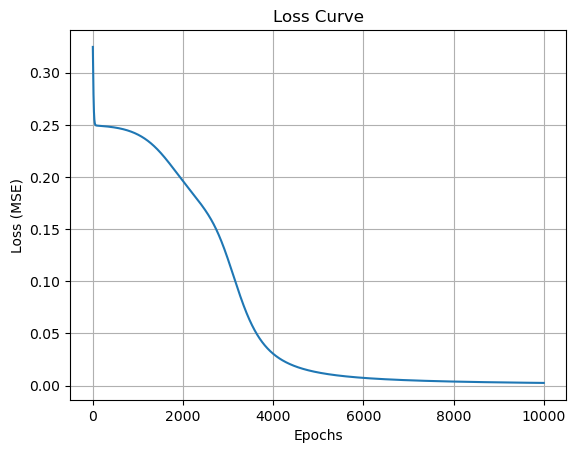

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class XORBackPropagation:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        np.random.seed(42)
        self.W_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.b_hidden = np.random.uniform(size=(1, hidden_size))
        self.W_hidden_output = np.random.uniform(size=(hidden_size, output_size))
        self.b_output = np.random.uniform(size=(1, output_size))
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        self.hidden_input = np.dot(X, self.W_input_hidden) + self.b_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.W_hidden_output) + self.b_output
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backward_propagation(self, X, y, output, learning_rate=0.1):
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)
        hidden_error = output_delta.dot(self.W_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        self.W_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.b_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.b_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, output, learning_rate)
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward_propagation(X)
        return np.round(output)

    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.title("Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss (MSE)")
        plt.grid(True)
        plt.show()

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

model = XORBackPropagation()
model.train(X, y)
print("\nPredictions:")
print(model.predict(X))
model.plot_loss()